## Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston, load_wine

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")

## Feature Selection

### 1. Filter Method

#### 1.1 Correlation Method

Filter Method uses correlation coefficient >> Pearson, Spearman (When the both columns are numeric)
                                           >> Kendalls (When out of the two columns one is categorical and other is numeric)

In [4]:
data_dict = load_boston()

In [5]:
boston_df = pd.DataFrame(data = data_dict.data, columns = data_dict.feature_names)

In [6]:
boston_df["PRICE"] = data_dict.target

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

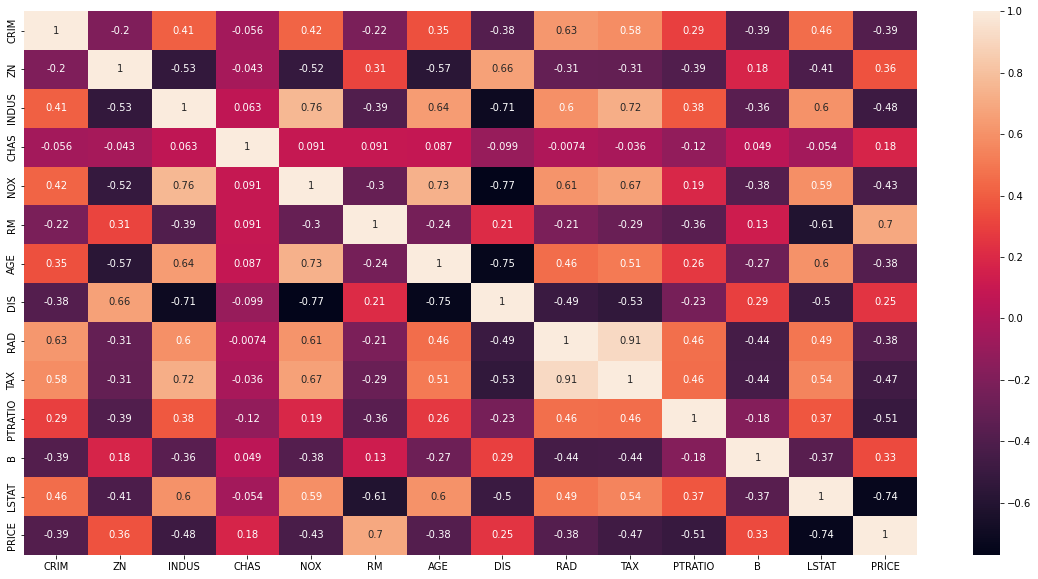

In [8]:
corr = boston_df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

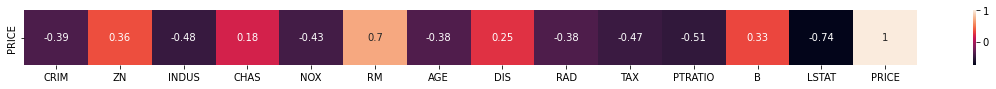

In [9]:
# We just need correlation of Price with other columns only
### Default Method is Pearson
corr = boston_df.corr().tail(1)
plt.figure(figsize = (20,1))
sns.heatmap(corr, annot = True)

In [10]:
boston_df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [11]:
## Kendall Method
corr2 = boston_df[["CHAS","PRICE"]].corr(method="kendall").tail(1)

In [12]:
corr2

,CHAS,PRICE
PRICE,0.115202,1.0


<AxesSubplot:>

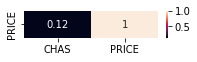

In [13]:
plt.figure(figsize = (3,0.5))
sns.heatmap(corr2,annot=True)

<AxesSubplot:>

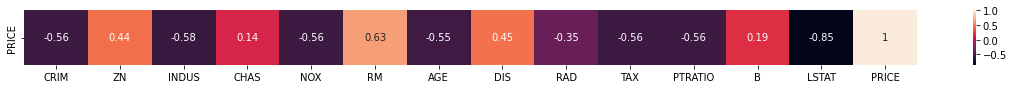

In [14]:
# Spearman
corr = boston_df.corr(method="spearman").tail(1)
plt.figure(figsize = (20,1))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

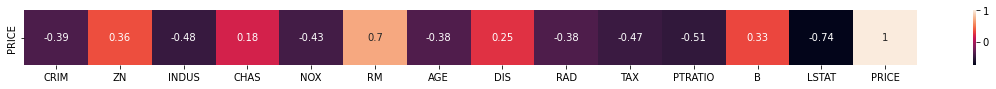

In [15]:
corr = boston_df.corr().tail(1)
plt.figure(figsize = (20,1))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

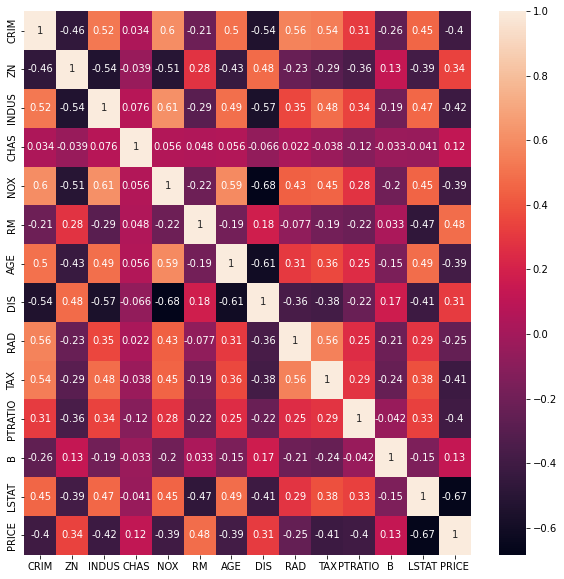

In [16]:
## Kendall Method
corr = boston_df.corr(method="kendall")
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

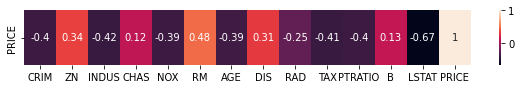

In [17]:
## Kendall Method
corr = boston_df.corr(method="kendall").tail(1)
plt.figure(figsize = (10,1))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

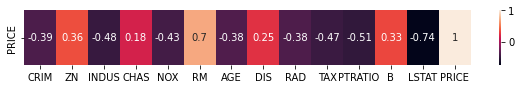

In [18]:
## Pearson Method
corr = boston_df.corr().tail(1)
plt.figure(figsize = (10,1))
sns.heatmap(corr, annot = True)

In [19]:
boston_df["B"].value_counts()

396.90    121
393.74      3
395.24      3
376.14      2
394.72      2
         ... 
240.16      1
389.61      1
374.43      1
338.92      1
391.99      1
Name: B, Length: 357, dtype: int64

## 2. Fisher's Score

In [20]:
# pip install skfeature-chappers

In [21]:
from skfeature.function.similarity_based import fisher_score

In [22]:
data_dict_wine = load_wine()

In [23]:
wine_df = pd.DataFrame(data = data_dict_wine.data, columns=data_dict_wine.feature_names)

In [24]:
wine_df["target"] = data_dict_wine.target

In [25]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [26]:
wine_df["target"].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [27]:
x = wine_df.drop("target", axis = 1)
y = wine_df["target"]

In [28]:
fisher_rank = fisher_score.fisher_score(x.to_numpy(),y)

In [29]:
fisher_rank

array([ 6,  0,  1, 12,  3,  2,  7, 11,  9,  4,  5, 10,  8])

<AxesSubplot:>

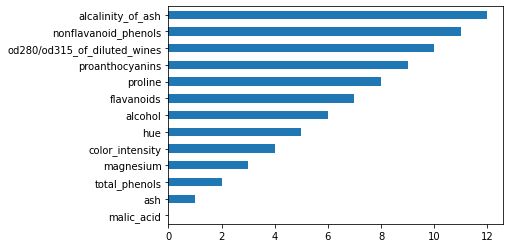

In [30]:
series_fisher_rank = pd.Series(fisher_rank, index = x.columns)
series_fisher_rank.sort_values().plot(kind = "barh")

In [31]:
x = boston_df.drop("PRICE", axis = 1)
y = boston_df["PRICE"]

<AxesSubplot:>

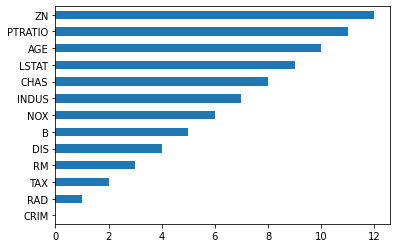

In [32]:
fisher_rank = fisher_score.fisher_score(x.to_numpy(),y)
series_fisher_rank = pd.Series(fisher_rank, index = x.columns)
series_fisher_rank.sort_values().plot(kind = "barh")

### 3. Variance Threshold Method

In [33]:
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [34]:
boston_df["TEST"] = 120

In [35]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,TEST
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,120.0
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.0
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,120.0
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,120.0
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,120.0
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,120.0
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,120.0


In [36]:
from sklearn.feature_selection import VarianceThreshold

In [37]:
var_th = VarianceThreshold(threshold = 0.0)

In [38]:
var_th.fit_transform(boston_df)
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [39]:
var_th.get_feature_names_out()

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'], dtype=object)

In [40]:
var_th_5 = VarianceThreshold(threshold=5)
var_th_5.fit_transform(boston_df)
var_th_5.get_feature_names_out()

array(['CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT', 'PRICE'],
      dtype=object)

### 4. Variance Inflation Factor

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,TEST
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0,120
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6,120


In [43]:
x = boston_df.drop(["PRICE","TEST"], axis=1)
y = boston_df["PRICE"]

In [44]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(vif)
    
vif_series = pd.Series(vif_list, x.columns)

In [45]:
vif_series

CRIM        2.100373
ZN          2.844013
INDUS      14.485758
CHAS        1.152952
NOX        73.894947
RM         77.948283
AGE        21.386850
DIS        14.699652
RAD        15.167725
TAX        61.227274
PTRATIO    85.029547
B          20.104943
LSTAT      11.102025
dtype: float64

<AxesSubplot:>

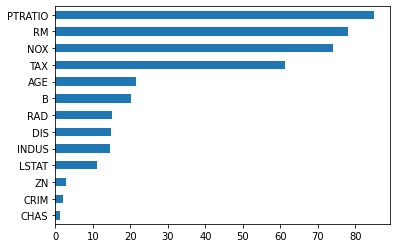

In [46]:
vif_series.sort_values().plot(kind = "barh")

In [47]:
x = boston_df.drop(["PRICE","TEST","PTRATIO"], axis=1)
y = boston_df["PRICE"]

<AxesSubplot:>

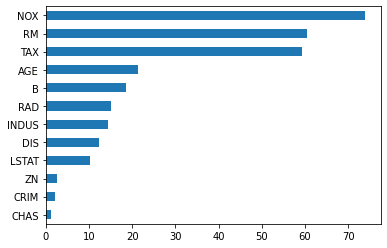

In [48]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(vif)
    
vif_series = pd.Series(vif_list, x.columns)
vif_series.sort_values().plot(kind = "barh")

### 5. Information Gain

Information Gain >> mutual information

#### Regression

In [49]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [50]:
boston_df = boston_df.drop("TEST", axis = 1)

In [51]:
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [52]:
y = boston_df.PRICE

In [53]:
x = boston_df.drop("PRICE", axis = 1)

In [54]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

<AxesSubplot:>

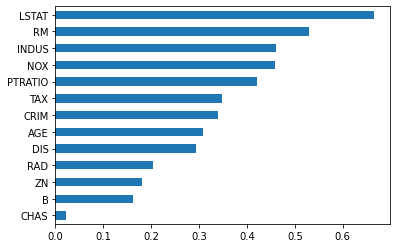

In [55]:
array1 = mutual_info_regression(x,y)

series = pd.Series(array1, index=x.columns)
series.sort_values().plot(kind = "barh")

#### Classification

In [56]:
wine_df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0


In [57]:
x = wine_df.drop("target", axis = 1)

In [58]:
y = wine_df.target

<AxesSubplot:>

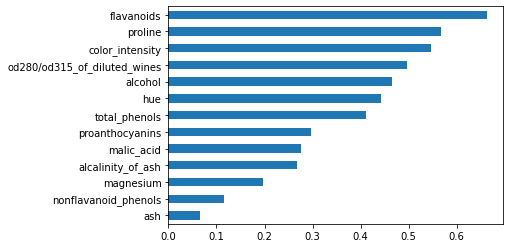

In [59]:
array1 = mutual_info_classif(x,y)
series = pd.Series(array1, index = x.columns)
series.sort_values().plot(kind = "barh")

### 6. Chi Square Test

In [60]:
titanic_df = pd.read_csv("titanic.csv")

In [61]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [63]:
titanic_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [64]:
titanic_df["Gender"].replace({"male":1,"female":0}, inplace = True) 

In [65]:
titanic_df["Gender"].value_counts()

1    577
0    314
Name: Gender, dtype: int64

In [66]:
titanic_df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [67]:
titanic_df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [68]:
x = titanic_df.drop("Survived", axis = 1)

In [69]:
y = titanic_df["Survived"]

In [70]:
x = x[["Pclass","Gender","SibSp","Parch"]]

In [71]:
from sklearn.feature_selection import chi2

In [72]:
chi_sqr, p_val = chi2(x,y)

In [73]:
chi_sqr

array([30.1152115 , 91.34477646,  1.75295827, 10.24366211])

In [74]:
p_val

array([4.07125230e-08, 1.20698302e-21, 1.85505268e-01, 1.37155024e-03])

In [75]:
chi2_df = pd.DataFrame({"chi_sqr":chi_sqr,"p_val":np.around(p_val,4)}, index = x.columns)

In [76]:
chi2_df

,chi_sqr,p_val
Pclass,30.115212,0.0000
Gender,91.344776,0.0000
SibSp,1.752958,0.1855
Parch,10.243662,0.0014


In [77]:
def get_hypothesis_status(p_val):
    if p_val < 0.05:
        return "Reject Null Hypothesis","Two Variables are Dependent"
    else:
        return "Accept Null Hypothesis", "Two Variables are Independent"

In [78]:
chi2_df[["Hypothesis","Result"]] = chi2_df.apply(lambda x: get_hypothesis_status(x["p_val"]),axis =1, result_type="expand")

In [79]:
chi2_df

,chi_sqr,p_val,Hypothesis,Result
Pclass,30.115212,0.0000,Reject Null Hypothesis,Two Variables are Dependent
Gender,91.344776,0.0000,Reject Null Hypothesis,Two Variables are Dependent
SibSp,1.752958,0.1855,Accept Null Hypothesis,Two Variables are Independent
Parch,10.243662,0.0014,Reject Null Hypothesis,Two Variables are Dependent


### 7. ANOVA Test

In [80]:
wine_df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0


In [81]:
from sklearn.feature_selection import f_classif

f_val, p_val = f_classif(wine_df.drop("target", axis = 1), wine_df["target"])

In [82]:
p_val

array([3.31950380e-36, 4.12722880e-14, 4.14996797e-06, 9.44447294e-14,
       8.96339544e-06, 2.13767002e-28, 3.59858583e-50, 3.88804090e-11,
       5.12535874e-12, 1.16200802e-33, 5.91766222e-30, 1.39310496e-44,
       5.78316836e-47])

In [83]:
df_anova = pd.DataFrame({"f_val":f_val, "p_val":np.around(p_val,5)}, index = wine_df.drop("target", axis = 1).columns)

In [84]:
df_anova

,f_val,p_val
alcohol,135.077624,0.00000
malic_acid,36.943425,0.00000
ash,13.312901,0.00000
alcalinity_of_ash,35.771637,0.00000
magnesium,12.429584,0.00001
total_phenols,93.733010,0.00000
flavanoids,233.925873,0.00000
nonflavanoid_phenols,27.575417,0.00000
proanthocyanins,30.271383,0.00000
color_intensity,120.664018,0.00000


In [85]:
df_anova[["Hypothesis","Result"]] = df_anova.apply(lambda x: get_hypothesis_status(x["p_val"]),axis =1, result_type="expand")

In [86]:
df_anova

,f_val,p_val,Hypothesis,Result
alcohol,135.077624,0.00000,Reject Null Hypothesis,Two Variables are Dependent
malic_acid,36.943425,0.00000,Reject Null Hypothesis,Two Variables are Dependent
ash,13.312901,0.00000,Reject Null Hypothesis,Two Variables are Dependent
alcalinity_of_ash,35.771637,0.00000,Reject Null Hypothesis,Two Variables are Dependent
magnesium,12.429584,0.00001,Reject Null Hypothesis,Two Variables are Dependent
total_phenols,93.733010,0.00000,Reject Null Hypothesis,Two Variables are Dependent
flavanoids,233.925873,0.00000,Reject Null Hypothesis,Two Variables are Dependent
nonflavanoid_phenols,27.575417,0.00000,Reject Null Hypothesis,Two Variables are Dependent
proanthocyanins,30.271383,0.00000,Reject Null Hypothesis,Two Variables are Dependent
color_intensity,120.664018,0.00000,Reject Null Hypothesis,Two Variables are Dependent


## 2. Wrapper Method

### 1. Forward Feature Selection

In [87]:
wine_df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0


In [106]:
x = wine_df.drop("target", axis = 1)
y = wine_df["target"]

In [107]:
import time
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn_model = KNeighborsClassifier()

sfs = SequentialFeatureSelector(knn_model, n_features_to_select=10, direction="forward", cv = 5, n_jobs=-1)

sfs.fit(x,y)

end_time = time.time()

total_time = end_time - start_time

print("Time Taken", total_time/60)

Time Taken 0.014445857206980387


In [108]:
sfs.get_support()

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False])

In [90]:
feature_names = sfs.get_feature_names_out()

In [91]:
feature_names

array(['alcohol', 'ash', 'alcalinity_of_ash', 'total_phenols',
       'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'od280/od315_of_diluted_wines'],
      dtype=object)

In [92]:
len(x.columns)

13

#### Using singel core of cpu

In [93]:
import time
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn_model = KNeighborsClassifier()

sfs = SequentialFeatureSelector(knn_model, n_features_to_select=10, direction="forward", cv = 5, n_jobs=1)

sfs.fit(x,y)

end_time = time.time()

total_time = end_time - start_time

print("Time Taken", total_time/60)

Time Taken 0.018217666943868


#### Find six best features

In [94]:
import time
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn_model = KNeighborsClassifier()

sfs = SequentialFeatureSelector(knn_model, n_features_to_select=6, direction="forward", cv = 5, n_jobs=1)

sfs.fit(x,y)

end_time = time.time()

total_time = end_time - start_time

print("Time Taken", total_time/60)

Time Taken 0.013076849778493245


In [95]:
sfs.get_feature_names_out()

array(['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'hue', 'od280/od315_of_diluted_wines'], dtype=object)

### 2. Backward Feature Eliminination

In [96]:
import time
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn_model = KNeighborsClassifier()

sfs = SequentialFeatureSelector(knn_model, n_features_to_select=6, direction="backward", cv = 5, n_jobs=1)

sfs.fit(x,y)

end_time = time.time()

total_time = end_time - start_time

print("Time Taken", total_time/60)

Time Taken 0.015704862276713052


In [97]:
sfs.get_feature_names_out()

array(['alcohol', 'flavanoids', 'proanthocyanins', 'color_intensity',
       'hue', 'od280/od315_of_diluted_wines'], dtype=object)

### 3. Bidirectional Feature Selection

In [98]:
# pip install mlxtend

In [99]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston, load_wine

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")


In [100]:
import time
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn_model = KNeighborsClassifier()

sfs = SequentialFeatureSelector(knn_model, k_features=6, floating=True, cv = 5, n_jobs=1)

sfs.fit(x,y)

end_time = time.time()

total_time = end_time - start_time

print("Time Taken", total_time/60)

Time Taken 0.013868566354115803


In [101]:
pd.DataFrame(sfs.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
1,"(6,)","[0.6944444444444444, 0.8333333333333334, 0.694...",0.75873,"(flavanoids,)"
2,"(0, 6)","[0.7777777777777778, 0.9444444444444444, 0.972...",0.921746,"(alcohol, flavanoids)"
3,"(0, 6, 7)","[0.8611111111111112, 0.9444444444444444, 0.972...",0.938413,"(alcohol, flavanoids, nonflavanoid_phenols)"
4,"(0, 6, 7, 10)","[0.8333333333333334, 0.9444444444444444, 0.972...",0.938571,"(alcohol, flavanoids, nonflavanoid_phenols, hue)"
5,"(0, 6, 7, 10, 11)","[0.7777777777777778, 0.9444444444444444, 1.0, ...",0.93873,"(alcohol, flavanoids, nonflavanoid_phenols, hu..."
6,"(0, 5, 6, 7, 10, 11)","[0.8055555555555556, 0.9166666666666666, 1.0, ...",0.93873,"(alcohol, total_phenols, flavanoids, nonflavan..."


In [102]:
import time
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn_model = KNeighborsClassifier()

sfs = SequentialFeatureSelector(knn_model, k_features=6, forward=False, cv = 5, n_jobs=1)

sfs.fit(x,y)

end_time = time.time()

total_time = end_time - start_time

print("Time Taken", total_time/60)

Time Taken 0.013198713461558024


In [103]:
pd.DataFrame(sfs.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7222222222222222, 0.6666666666666666, 0.638...",0.69127,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.75, 0.7777777777777778, 0.9166666666666666,...",0.820317,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
11,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11)","[0.7777777777777778, 0.9444444444444444, 0.916...",0.927778,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
10,"(0, 1, 2, 3, 6, 7, 8, 9, 10, 11)","[0.8333333333333334, 0.9444444444444444, 0.916...",0.938889,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
9,"(0, 1, 2, 3, 6, 7, 8, 9, 11)","[0.8333333333333334, 0.9444444444444444, 0.916...",0.938889,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
8,"(0, 1, 2, 3, 6, 8, 9, 11)","[0.8333333333333334, 0.9444444444444444, 0.916...",0.938889,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
7,"(0, 1, 3, 6, 8, 9, 11)","[0.8055555555555556, 0.9444444444444444, 0.916...",0.933333,"(alcohol, malic_acid, alcalinity_of_ash, flava..."
6,"(0, 1, 3, 6, 8, 9)","[0.8333333333333334, 0.9444444444444444, 0.916...",0.933175,"(alcohol, malic_acid, alcalinity_of_ash, flava..."


In [104]:
import time
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn_model = KNeighborsClassifier()

sfs = SequentialFeatureSelector(knn_model, k_features=6, forward=True, cv = 5, n_jobs=1)

sfs.fit(x,y)

end_time = time.time()

total_time = end_time - start_time

print("Time Taken", total_time/60)

Time Taken 0.011397655804951985


In [105]:
pd.DataFrame(sfs.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
1,"(6,)","[0.6944444444444444, 0.8333333333333334, 0.694...",0.75873,"(flavanoids,)"
2,"(0, 6)","[0.7777777777777778, 0.9444444444444444, 0.972...",0.921746,"(alcohol, flavanoids)"
3,"(0, 6, 7)","[0.8611111111111112, 0.9444444444444444, 0.972...",0.938413,"(alcohol, flavanoids, nonflavanoid_phenols)"
4,"(0, 6, 7, 10)","[0.8333333333333334, 0.9444444444444444, 0.972...",0.938571,"(alcohol, flavanoids, nonflavanoid_phenols, hue)"
5,"(0, 6, 7, 10, 11)","[0.7777777777777778, 0.9444444444444444, 1.0, ...",0.93873,"(alcohol, flavanoids, nonflavanoid_phenols, hu..."
6,"(0, 5, 6, 7, 10, 11)","[0.8055555555555556, 0.9166666666666666, 1.0, ...",0.93873,"(alcohol, total_phenols, flavanoids, nonflavan..."


### 4 Recursive Feature Elimination

In [109]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=12)

rfe = RFE(dt_model,n_features_to_select=7)

rfe.fit(x,y)
series = pd.Series(rfe.get_support(),index=x.columns)

In [110]:
series

alcohol                          True
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                       True
nonflavanoid_phenols            False
proanthocyanins                  True
color_intensity                  True
hue                              True
od280/od315_of_diluted_wines     True
proline                          True
dtype: bool

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [138]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [139]:
dt_model.feature_importances_

array([0.01518265, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.29513209, 0.        , 0.        , 0.18298918,
       0.097814  , 0.        , 0.40888208])

In [140]:
fi_series = pd.Series(dt_model.feature_importances_, index = x.columns)

<AxesSubplot:>

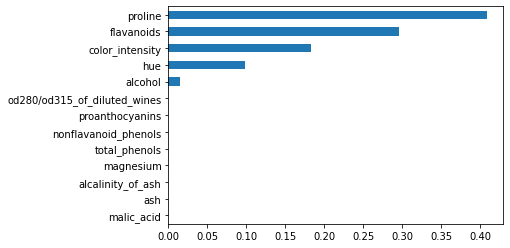

In [141]:
fi_series.sort_values().plot(kind="barh")

In [117]:
x.shape

(178, 13)

In [142]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier()

ab_model.fit(x_train,y_train)
ab_model.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.14, 0.1 ,
       0.24, 0.02])

<AxesSubplot:>

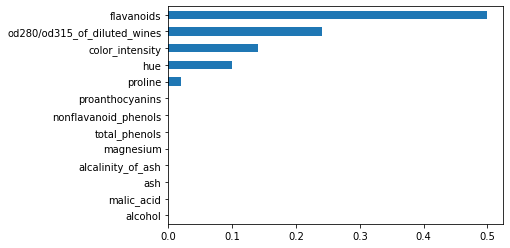

In [143]:
ab_fi_series = pd.Series(ab_model.feature_importances_, index = x.columns)
ab_fi_series.sort_values().plot(kind = "barh")

In [144]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier()


rfe = RFE(ab_model,n_features_to_select=7)

rfe.fit(x,y)
series = pd.Series(rfe.get_support(),index=x.columns)

In [146]:
series = pd.Series(rfe.get_support(),index=x.columns)

In [147]:
series

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                    True
flavanoids                       True
nonflavanoid_phenols            False
proanthocyanins                  True
color_intensity                  True
hue                              True
od280/od315_of_diluted_wines     True
proline                          True
dtype: bool

### 5. Exahustive Feature Selection

In [148]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=12)

efs = ExhaustiveFeatureSelector(dt_model,min_features=5, max_features=7)

efs.fit(x,y)


Features: 4719/4719

{0: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([0.72222222, 0.72222222, 0.69444444, 0.77142857, 0.82857143]),
  'avg_score': 0.7477777777777778,
  'feature_names': ('alcohol',
   'malic_acid',
   'ash',
   'alcalinity_of_ash',
   'magnesium')},
 1: {'feature_idx': (0, 1, 2, 3, 5),
  'cv_scores': array([0.72222222, 0.97222222, 0.77777778, 0.82857143, 0.85714286]),
  'avg_score': 0.8315873015873017,
  'feature_names': ('alcohol',
   'malic_acid',
   'ash',
   'alcalinity_of_ash',
   'total_phenols')},
 2: {'feature_idx': (0, 1, 2, 3, 6),
  'cv_scores': array([0.86111111, 0.94444444, 0.77777778, 0.88571429, 0.94285714]),
  'avg_score': 0.8823809523809525,
  'feature_names': ('alcohol',
   'malic_acid',
   'ash',
   'alcalinity_of_ash',
   'flavanoids')},
 3: {'feature_idx': (0, 1, 2, 3, 7),
  'cv_scores': array([0.77777778, 0.86111111, 0.66666667, 0.82857143, 0.85714286]),
  'avg_score': 0.7982539682539682,
  'feature_names': ('alcohol',
   'malic_acid',
   'ash',
   'alcalinit

In [149]:
result_df = pd.DataFrame(efs.subsets_)

In [151]:
result_df.T

,feature_idx,cv_scores,avg_score,feature_names
0,"(0, 1, 2, 3, 4)","[0.7222222222222222, 0.7222222222222222, 0.694...",0.747778,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
1,"(0, 1, 2, 3, 5)","[0.7222222222222222, 0.9722222222222222, 0.777...",0.831587,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
2,"(0, 1, 2, 3, 6)","[0.8611111111111112, 0.9444444444444444, 0.777...",0.882381,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
3,"(0, 1, 2, 3, 7)","[0.7777777777777778, 0.8611111111111112, 0.666...",0.798254,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
4,"(0, 1, 2, 3, 8)","[0.7777777777777778, 0.9444444444444444, 0.777...",0.848571,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
...,...,...,...,...
4714,"(5, 6, 7, 8, 10, 11, 12)","[0.7777777777777778, 0.8055555555555556, 0.888...",0.84873,"(total_phenols, flavanoids, nonflavanoid_pheno..."
4715,"(5, 6, 7, 9, 10, 11, 12)","[0.9722222222222222, 0.8055555555555556, 0.916...",0.916032,"(total_phenols, flavanoids, nonflavanoid_pheno..."
4716,"(5, 6, 8, 9, 10, 11, 12)","[0.9722222222222222, 0.8055555555555556, 0.916...",0.916032,"(total_phenols, flavanoids, proanthocyanins, c..."
4717,"(5, 7, 8, 9, 10, 11, 12)","[0.9444444444444444, 0.7777777777777778, 0.888...",0.882222,"(total_phenols, nonflavanoid_phenols, proantho..."


In [152]:
result_df.T.loc[4715,"cv_scores"]

array([0.97222222, 0.80555556, 0.91666667, 0.91428571, 0.97142857])

In [153]:
result_df.T.loc[4716,"cv_scores"]

array([0.97222222, 0.80555556, 0.91666667, 0.91428571, 0.97142857])

## Embedded Method

In [ ]:
Embedded Method:
    1. Regularisation
        1. Ridge Regression
        2. Lasso Regression
    2. Tree Based Models:
        1. Decision Tree Feature Importance
        2. Random Forest Feature Importance
        3. Ada Boost Feature Importance
        4. Gradient Boost Feature Importance
        5. Extreame Gradient Boost Feature Importance
        6. CatBoost Fetaure Importance
        